# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Collection

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_train.shape

(1460, 81)

In [8]:
categorical_columns = df_train.select_dtypes(include = ["object","category"]).columns

In [9]:
print("Number of categorical columns in training dataset", len(categorical_columns))
print("list of categorical columns in training data set", list(categorical_columns))

Number of categorical columns in training dataset 43
list of categorical columns in training data set ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [10]:
df_train.shape

(1460, 81)

In [11]:
null_values = df_train.columns[df_train.isnull().any()]
df_train[null_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
for col in categorical_columns:
    number_of_unique_cat = df_train[col].nunique()
    list_of_unique_cat = df_train[col].unique()
    
    print(f"Column: {col}")
    print(f"No. of unique categories {number_of_unique_cat}")
    print(f"Name of unique categories {list_of_unique_cat}")

Column: MSZoning
No. of unique categories 5
Name of unique categories ['RL' 'RM' 'C (all)' 'FV' 'RH']
Column: Street
No. of unique categories 2
Name of unique categories ['Pave' 'Grvl']
Column: Alley
No. of unique categories 2
Name of unique categories [nan 'Grvl' 'Pave']
Column: LotShape
No. of unique categories 4
Name of unique categories ['Reg' 'IR1' 'IR2' 'IR3']
Column: LandContour
No. of unique categories 4
Name of unique categories ['Lvl' 'Bnk' 'Low' 'HLS']
Column: Utilities
No. of unique categories 2
Name of unique categories ['AllPub' 'NoSeWa']
Column: LotConfig
No. of unique categories 5
Name of unique categories ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Column: LandSlope
No. of unique categories 3
Name of unique categories ['Gtl' 'Mod' 'Sev']
Column: Neighborhood
No. of unique categories 25
Name of unique categories ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Tim

C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


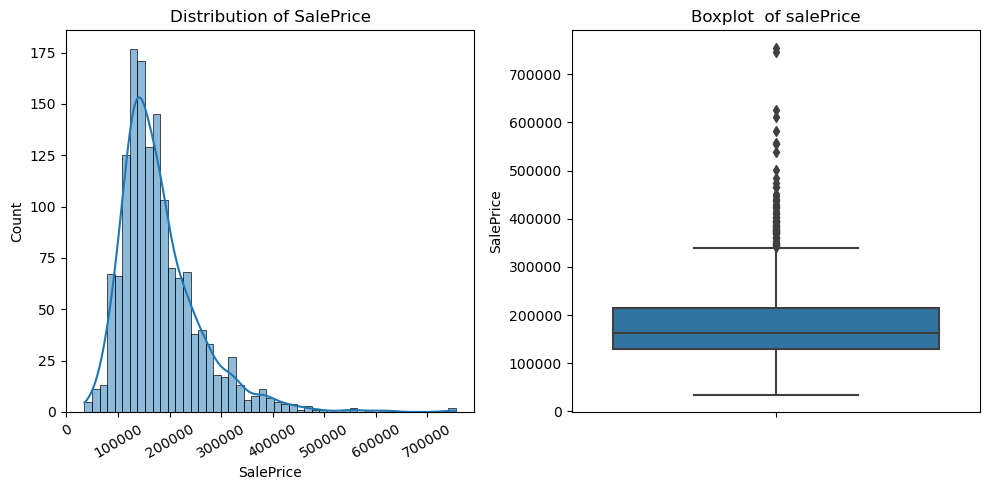

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df_train["SalePrice"],kde=True)
plt.title("Distribution of SalePrice")
plt.xticks(rotation=30)

plt.subplot(1,2,2)
sns.boxplot(y=df_train["SalePrice"])
plt.title("Boxplot  of salePrice")

plt.tight_layout()
plt.show()

In [14]:
df_train[categorical_columns] = df_train[categorical_columns].fillna("None")

In [15]:
label_encode_cols = [
    'LotShape', 'LandSlope', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 
    'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'PavedDrive'
]

In [16]:
label_encoder = LabelEncoder()

for col in label_encode_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [17]:
onehot_encode_cols = [
    'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 
    'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
    'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 
    'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 
    'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition','Neighborhood', 'Exterior1st', 'Exterior2nd'
]

In [18]:
df_train = pd.get_dummies(df_train,columns = onehot_encode_cols,prefix = onehot_encode_cols)

In [19]:
print("New Training data shape: ", df_train.shape)

New Training data shape:  (1460, 242)


In [20]:
print("New columns :",df_train.columns.tolist())

New columns : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_None', 'Alley_Pave', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', '

In [21]:
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1,60,65.0,8450,3,0,7,5,2003,2003,...,False,False,False,False,False,False,False,True,False,False
1,2,20,80.0,9600,3,0,6,8,1976,1976,...,False,False,True,False,False,False,False,False,False,False
2,3,60,68.0,11250,0,0,7,5,2001,2002,...,False,False,False,False,False,False,False,True,False,False
3,4,70,60.0,9550,0,0,7,5,1915,1970,...,False,False,False,False,False,False,False,False,False,True
4,5,60,84.0,14260,0,0,8,5,2000,2000,...,False,False,False,False,False,False,False,True,False,False


In [22]:
null_values = df_train.columns[df_train.isnull().any()]
df_train[null_values].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [23]:
numerical_columns = df_train.select_dtypes(include=['int64',"float64"]).columns

print("\n numerical columns: ", len(numerical_columns))

null_num = df_train[numerical_columns].isnull().sum()
print(null_num)
null_num = null_num[null_num>0]

print("Numerical columns with nulls: \n",null_num)


 numerical columns:  38
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
Numerical columns with nulls: 
 LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
df_train[numerical_columns] = imputer.fit_transform(df_train[numerical_columns])

In [25]:
df_train.isnull().sum()

Id                     0
MSSubClass             0
LotFrontage            0
LotArea                0
LotShape               0
                      ..
Exterior2nd_Stone      0
Exterior2nd_Stucco     0
Exterior2nd_VinylSd    0
Exterior2nd_Wd Sdng    0
Exterior2nd_Wd Shng    0
Length: 242, dtype: int64

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 242 entries, Id to Exterior2nd_Wd Shng
dtypes: bool(188), float64(38), int32(16)
memory usage: 792.9 KB


In [27]:
cat_col = df_train.select_dtypes(include=["object"]).columns

In [28]:
print(f"No of categorical columns: {len(cat_col)}")

No of categorical columns: 0


In [29]:
X = df_train.drop(["Id","SalePrice"],axis=1)
y = df_train["SalePrice"]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor


In [31]:
x_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True)


In [32]:
x_train

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
254,20.0,70.0,8400.0,3,0,5.0,6.0,1957.0,1957.0,0.0,...,False,False,True,False,False,False,False,False,False,False
1066,60.0,59.0,7837.0,0,0,6.0,7.0,1993.0,1994.0,0.0,...,False,False,False,False,False,False,False,True,False,False
638,30.0,67.0,8777.0,3,0,5.0,7.0,1910.0,1950.0,0.0,...,False,False,False,False,False,False,False,False,True,False
799,50.0,60.0,7200.0,3,0,5.0,7.0,1937.0,1950.0,252.0,...,False,False,False,False,False,False,False,False,True,False
380,50.0,50.0,5000.0,3,0,5.0,6.0,1924.0,1950.0,0.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20.0,78.0,9317.0,0,0,6.0,5.0,2006.0,2006.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1130,50.0,65.0,7804.0,3,0,4.0,3.0,1928.0,1950.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1294,20.0,60.0,8172.0,3,0,5.0,7.0,1955.0,1990.0,0.0,...,False,False,False,False,True,False,False,False,False,False
860,50.0,55.0,7642.0,3,0,7.0,8.0,1918.0,1998.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [33]:
xgb_model = xgb.XGBRegressor(random_state=42,n_estimators=1000,learning_rate=0.02)
et_model = ExtraTreesRegressor(random_state=42,n_estimators=100)
rf_model = RandomForestRegressor(random_state=42,n_estimators=100)

In [34]:
print("Training and evaluating XGBoost")
xgb_model.fit(x_train,y_train)
xgb_preds = xgb_model.predict(X_val)

xgb_mae = mean_absolute_error(y_val,xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(y_val,xgb_preds))
xgb_r2 = r2_score(y_val,xgb_preds)

print("Xgboost results: ")
print(f"MAE: {xgb_mae: .4f}")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"R^2 : {xgb_r2:.4f}\n")

Training and evaluating XGBoost
Xgboost results: 
MAE:  15738.5699
RMSE: 25280.8183
R^2 : 0.9167



In [35]:
print("Training and evaluating extra trees: ")
et_model.fit(x_train,y_train)
et_preds = et_model.predict(X_val)

et_mae = mean_absolute_error(y_val,et_preds)
et_rmse = np.sqrt(mean_squared_error(y_val,et_preds))
et_r2 = r2_score(y_val,et_preds)

print("Extra Trees Results:")
print(f"MAE: {et_mae:.4f}")
print(f"RMSE: {et_rmse:.4f}")
print(f"R²: {et_r2:.4f}\n")

Training and evaluating extra trees: 
Extra Trees Results:
MAE: 17734.4630
RMSE: 29686.2873
R²: 0.8851



In [36]:
print("Training and evaluating Random Forest.. ")
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(X_val)

rf_mae = mean_absolute_error(y_val, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_val,rf_preds))
rf_r2 = r2_score(y_val,rf_preds)

print("Random Forest results: ")
print(f"MAE: {rf_mae: .4f}")
print(f"RMSE: {rf_rmse: .4f}")
print(f"R²: {rf_r2:.4f}\n")

Training and evaluating Random Forest.. 
Random Forest results: 
MAE:  17440.2457
RMSE:  29285.7773
R²: 0.8882



In [37]:
print("Model Comparison on Validation Set:")
print(f"{'Metric':<10} {'XGBoost':<12} {'Extra Trees':<12} {'Random Forest':<12}")
print(f"{'MAE':<10} {xgb_mae:<12.4f} {et_mae:<12.4f} {rf_mae:<12.4f}")
print(f"{'RMSE':<10} {xgb_rmse:<12.4f} {et_rmse:<12.4f} {rf_rmse:<12.4f}")
print(f"{'R²':<10} {xgb_r2:<12.4f} {et_r2:<12.4f} {rf_r2:<12.4f}")

Model Comparison on Validation Set:
Metric     XGBoost      Extra Trees  Random Forest
MAE        15738.5699   17734.4630   17440.2457  
RMSE       25280.8183   29686.2873   29285.7773  
R²         0.9167       0.8851       0.8882      


In [38]:
final_model = xgb.XGBRegressor(random_state=42, n_estimators=1000, learning_rate=0.02)
final_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
import sklearn
import xgboost
print("sklearn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)


sklearn: 1.5.2
xgboost: 3.0.5


In [40]:
final_model = xgb.XGBRegressor(random_state=42, n_estimators=1000, learning_rate=0.02)
final_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

# Now working on Testing Data

In [41]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
test_ids = df_test["Id"]


In [43]:
categorical_columns = df_test.select_dtypes(include=["object"]).columns

In [44]:
for col in categorical_columns:
    no_of_col = df_test[col].nunique()
    unique_cols = df_test[col].unique()
    print(f"Name of Column: {col}")
    print(f"No. of Cat Cols: {no_of_col}")
    print(f"unique catagories in each col: {unique_cols}")

Name of Column: MSZoning
No. of Cat Cols: 5
unique catagories in each col: ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
Name of Column: Street
No. of Cat Cols: 2
unique catagories in each col: ['Pave' 'Grvl']
Name of Column: Alley
No. of Cat Cols: 2
unique catagories in each col: [nan 'Pave' 'Grvl']
Name of Column: LotShape
No. of Cat Cols: 4
unique catagories in each col: ['Reg' 'IR1' 'IR2' 'IR3']
Name of Column: LandContour
No. of Cat Cols: 4
unique catagories in each col: ['Lvl' 'HLS' 'Bnk' 'Low']
Name of Column: Utilities
No. of Cat Cols: 1
unique catagories in each col: ['AllPub' nan]
Name of Column: LotConfig
No. of Cat Cols: 5
unique catagories in each col: ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
Name of Column: LandSlope
No. of Cat Cols: 3
unique catagories in each col: ['Gtl' 'Mod' 'Sev']
Name of Column: Neighborhood
No. of Cat Cols: 25
unique catagories in each col: ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' '

In [45]:
df_test[categorical_columns] = df_test[categorical_columns].fillna('None')

In [46]:
for col in label_encode_cols:
    trained_classes = set(label_encoder.classes_)
    test_values = set(df_test[col].unique())
    unseen_values = test_values - trained_classes
    
    if unseen_values:
        print(f"Warning: Found unseen values {unseen_values} in column '{col}'. Replacing with most frequent class.")
        most_frequent = label_encoder.classes_[0]  
        df_test[col] = df_test[col].replace(list(unseen_values), most_frequent)

    df_test[col] = label_encoder.transform(df_test[col])

In [47]:
df_test = pd.get_dummies(df_test, columns=onehot_encode_cols, prefix=onehot_encode_cols)

In [52]:
missing_cols = set(x_train.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0
df_test = df_test[x_train.columns]

In [53]:
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop(['Id', 'SalePrice'])

In [54]:
imputer.fit(df_train[numerical_features])

df_train[numerical_features] = imputer.transform(df_train[numerical_features])
df_test[numerical_features] = imputer.transform(df_test[numerical_features])

In [55]:
df_test.dtypes

MSSubClass             float64
LotFrontage            float64
LotArea                float64
LotShape                 int32
LandSlope                int32
                        ...   
Exterior2nd_Stone         bool
Exterior2nd_Stucco        bool
Exterior2nd_VinylSd       bool
Exterior2nd_Wd Sdng       bool
Exterior2nd_Wd Shng       bool
Length: 240, dtype: object

In [56]:
test_predictions = final_model.predict(df_test)

print("Predictions made successfully!")
print("Number of predictions:", len(test_predictions))
print("First few predictions:", test_predictions[:5])

Predictions made successfully!
Number of predictions: 1459
First few predictions: [128077.07 160220.53 193091.17 188786.42 211839.17]


C:\Users\prasad ayithireddy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


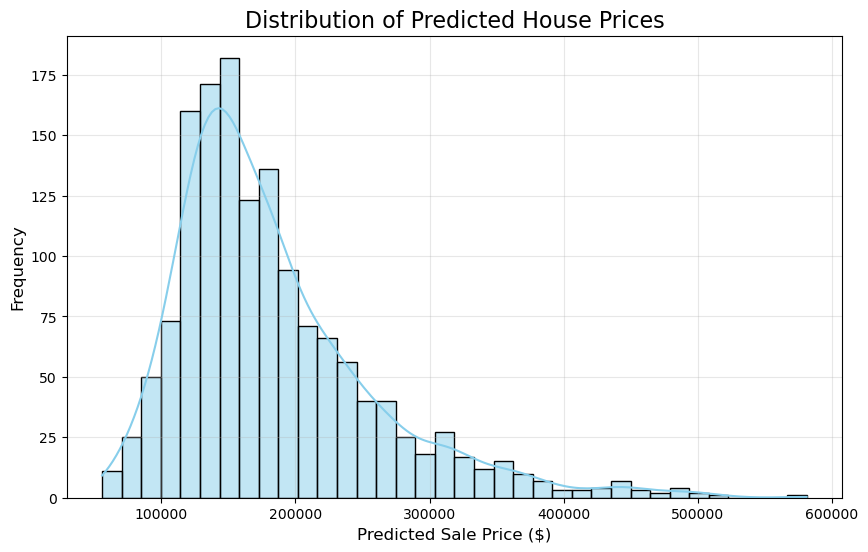

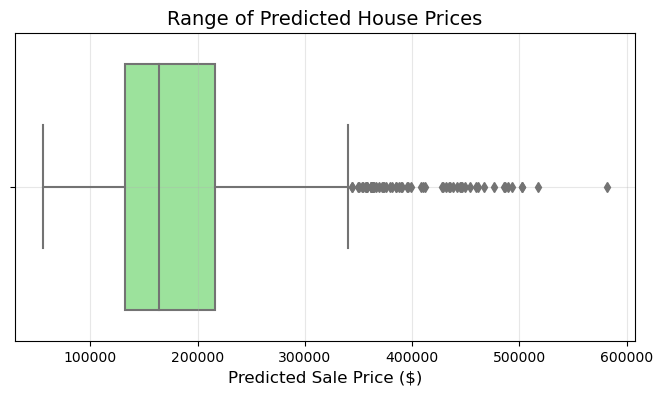

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(test_predictions, kde=True, color='skyblue')
plt.title('Distribution of Predicted House Prices', fontsize=16)
plt.xlabel('Predicted Sale Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=test_predictions, color='lightgreen')
plt.title('Range of Predicted House Prices', fontsize=14)
plt.xlabel('Predicted Sale Price ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [58]:
submission_df = pd.DataFrame({
    'Id': test_ids, 
    'SalePrice': test_predictions
})

In [59]:
submission_df.to_csv('submission.csv', index=False)

print("Submission file created: 'submission.csv'")
print("Submission file preview:")
print(submission_df.head())

Submission file created: 'submission.csv'
Submission file preview:
     Id      SalePrice
0  1461  128077.070312
1  1462  160220.531250
2  1463  193091.171875
3  1464  188786.421875
4  1465  211839.171875
